# Modeling & Evaluation

In order to prepare the data for modeling, I imported the training data set and selected the numeric features with the strongest correlations to Sale Price. I scaled the data, ran cross validations, and fit Linear Regression, LassoCV, and RidgeCV models to the training and testing sets. I used r2 scoring to score each subset, and found that LassoCV returned the highest score both on the training and testing data. I then imported the testing data .csv and proceeded to run the model on the unseen data. Comparing the r2 scores of the training and testing data, there is relatively little difference in score, meaning that the model performed well on unseen data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score


%matplotlib inline

In [3]:
df = pd.read_csv('./datasets/train_v2.csv')
df.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Age
0,109,533352170,60,0.0,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,1,0,0,0,0,0,0,42
1,544,531379050,60,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,1,0,0,0,0,0,0,22
2,153,535304180,20,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,65
3,318,916386060,60,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,1,0,0,0,0,0,0,12
4,255,906425045,50,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,118


### Preprocessing the Data For Modeling

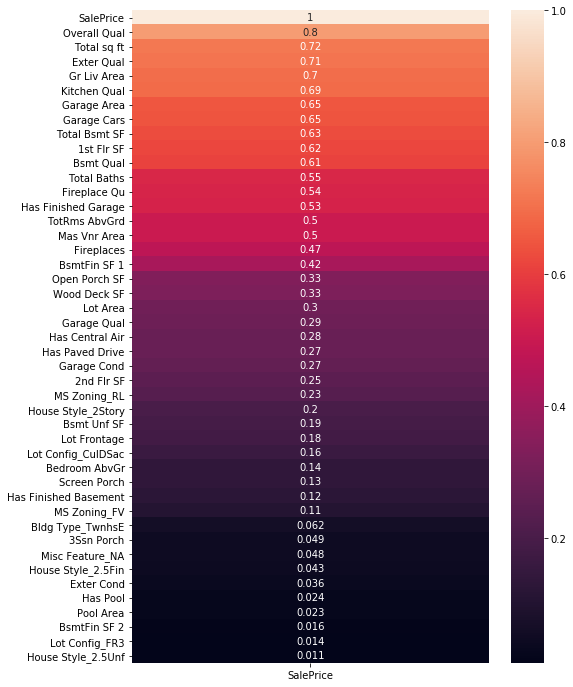

In [4]:
# Selecting the best variables and setting them as predictors for the model

correlations = df.corr()['SalePrice'][df.corr()['SalePrice'] >= 0]
corr_list = [x for x in correlations.index if x != 'SalePrice']

plt.figure(figsize=(8, 12))
sns.heatmap(correlations.to_frame().sort_values('SalePrice', ascending=False), annot=True)

In [5]:
X = df[corr_list]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Data Scaling, Cross-Validation, and Model Fitting

In [7]:
ss = StandardScaler()
ss.fit(X_train)

X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [8]:
lr = LinearRegression()
lasso = LassoCV()
ridge = RidgeCV()

print('linear regression:', cross_val_score(lr, X_train_sc, y_train, cv=3).mean())
print('lasso:', cross_val_score(lasso, X_train_sc, y_train, cv=3).mean())
print('ridge:', cross_val_score(ridge, X_train_sc, y_train, cv=3).mean())

linear regression: 0.627007227027402
lasso: 0.7657734993559063
ridge: 0.753600214593474


In [11]:
lasso.fit(X_train_sc, y_train)

lasso_preds = lasso.predict(X_test_sc)
lasso_preds_train = lasso.predict(X_train_sc)

lasso_preds[:10]

array([125945.84991654, 226547.06388499, 277776.01473215, 131500.3510166 ,
       205470.46282377, 336606.30016981, 183749.15870243, 280867.35159229,
       161920.67713908, 100382.71462752])

# R2 Scores: Train vs. Test

The r2 score returns the percentage of variance that can be explained by the model. The fact that the train and test scores are similar is a good indication that the model can be used reliably on new information.

In [47]:
print('Training Score', r2_score(y_train, lasso_preds_train))
print('Test Score    ', r2_score(y_test, lasso_preds))
print('Test - Train  ', (r2_score(y_test, lasso_preds)) - (r2_score(y_train, lasso_preds_train)))

Training Score 0.8165383141414727
Test Score     0.8687584042500851
Test - Train   0.052220090108612394


# Predicting the Sale Price of Unseen Test Data

In [16]:
test = pd.read_csv('./datasets/test_v2.csv')
test.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,...,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,Age
0,2658,902301120,190,69.0,9142,6,8,0.0,3,2,...,0,0,1,0,0,1,0,0,0,108
1,2718,905108090,90,0.0,9662,5,4,0.0,3,3,...,0,0,0,0,0,0,1,0,0,41
2,2414,528218130,60,58.0,17104,7,5,0.0,4,3,...,0,0,1,0,0,0,0,0,0,12
3,1989,902207150,30,60.0,8520,5,6,0.0,4,3,...,0,0,0,0,0,0,0,0,0,95
4,625,535105100,20,0.0,9500,6,5,247.0,3,3,...,0,0,0,0,0,0,0,0,0,55


In [18]:
X_new_data = test[['Lot Frontage', 'Lot Area', 'Overall Qual', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
                   'Bsmt Qual', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', 
                   '2nd Flr SF', 'Gr Liv Area', 'Bedroom AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces',
                   'Fireplace Qu', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Wood Deck SF',
                   'Open Porch SF', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Total Baths', 
                   'Has Finished Garage', 'Has Finished Basement', 'Total sq ft', 'Has Pool', 'Has Paved Drive',
                   'Has Central Air', 'Lot Config_CulDSac', 'Lot Config_FR3', 'MS Zoning_FV', 'MS Zoning_RL',
                   'Misc Feature_NA', 'House Style_2.5Fin', 'House Style_2.5Unf', 'House Style_2Story',
                   'Bldg Type_TwnhsE']]

X_new_data_sc = ss.transform(X_new_data)

pred_5 = lasso.predict(X_new_data_sc)

test['SalePrice'] = pd.Series(pred_5)
test['SalePrice'].head()

0    168323.525062
1    238170.501145
2    240536.132824
3    163195.654534
4    234036.614409
Name: SalePrice, dtype: float64

In [21]:
# Predictions! These have been exported and submitted to Kaggle for final scoring.

lasso_predictions_v5 = test.loc[:, ['Id', 'SalePrice']]
lasso_predictions_v5.head()

,Id,SalePrice
0,2658,168323.525062
1,2718,238170.501145
2,2414,240536.132824
3,1989,163195.654534
4,625,234036.614409


In [22]:
lasso_predictions_v5.to_csv('./datasets/Kaggle Submissions/predictions_v5.csv', index=False)

## Lasso Coefficients

Here we can see the coefficients for the top predictors of Sale Price. This list isn't far removed from our pre-model assessment, though variables like Finished Basement Square Footage factored in heavier than expected.

In [53]:
df_coefs = pd.DataFrame(lasso.coef_, index=X.columns, columns = ['Coefficient'])

coef_mask = df_coefs[df_coefs['Coefficient'] != 0]

coef_mask.abs().sort_values('Coefficient', ascending=False)[:11]

,Coefficient
Overall Qual,19693.580132
Exter Qual,10786.159755
Total sq ft,9651.743522
Kitchen Qual,8250.417916
Gr Liv Area,5832.191019
Garage Cars,5407.029956
Bsmt Qual,5308.482250
BsmtFin SF 1,5022.147672
Fireplace Qu,4673.339035
1st Flr SF,4464.944497


In [51]:
# Percentage of variables in the original data that have been zeroed out by the lasso:
len(df_coefs[df_coefs['Coefficient'] == 0]) / len(df_coefs['Coefficient'])

0.5454545454545454

# Plotting the Residuals

Due to the mysterious nature of the actual Sale Prices of the test data set, it is difficult to gauge the true efficacy of the model. However, we can get a ballpark idea by plotting the initial y_test subset of prices against the Lasso predictions. The model performs best on homes that fall within the median price range, with some outliers on the lower and higher ends of the price spectrum. This is most likely due to sparse representation of homes within those ranges in the data set. 

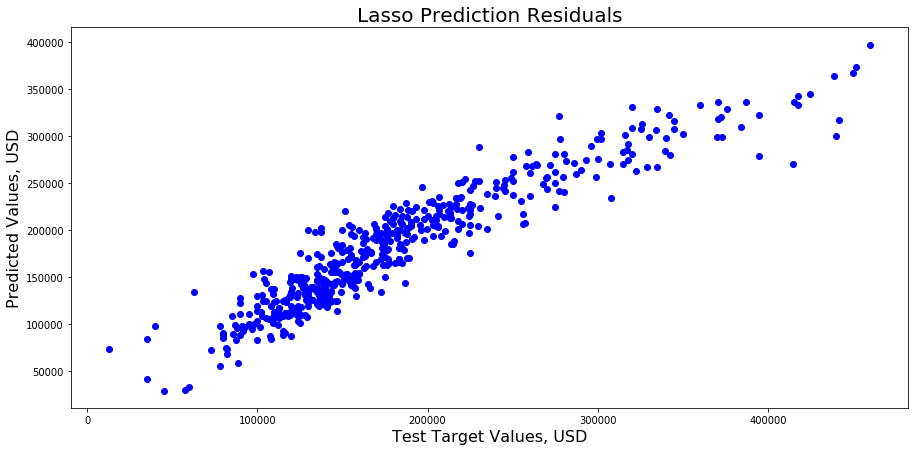

In [43]:
plt.figure(figsize=(15,7))

plt.scatter(y_test, lasso_preds, color='b');
plt.title('Lasso Prediction Residuals', fontsize=20)
plt.xlabel('Test Target Values, USD', fontsize=16)
plt.ylabel('Predicted Values, USD', fontsize=16)
plt.show()

# Conclusion

We now have a model that can be used to predict the price of homes in the future. Based on this model, the most important factors that contribute to the value of a home are:

- **Overall Quality**
- **Exterior Quality**
- **Total Square Footage**
- **Kitchen Quality**	
- **Living Area	Square Footage**
- **Garage Car Capacity**
- **Basement Quality**	
- **Basement Condition**
- **Fireplace Quality**	
- **First Floor Square Footage**	
- **Area of Exterior Masonry**	


###  Improving Model Accuracy in the Future
To further improve model accuracy, I would continue to engineer features within the data set, especially those categorical features that did not contribute to this mode. I also think the model would benefit from additional parameter tuning, combined with more comprehensive K-folds cross-validation.